In [37]:
%load_ext rpy2.ipython
from IPython.display import FileLink

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [68]:
%%R
library(dplyr)
library(ggplot2)
library(tidyr)
library(grid)

In [39]:
%%R
l2fc.df = tbl_df(read.table("../data/l2fc_table.csv",
           sep = ",",
           header = TRUE))
l2fc.df

Source: local data frame [5,690 x 18]

   Day Treatment      OTU log2FoldChange     lfcSE    Rank1         Rank2
1    3    13CCPS   OTU.79     1.04828817 0.4591118 Bacteria Bacteroidetes
2    3    13CCPS   OTU.50     1.24515489 0.4992662 Bacteria Bacteroidetes
3    3    13CCPS  OTU.162    -0.22842027 0.6758637 Bacteria Bacteroidetes
4    3    13CCPS  OTU.156     0.67260191 0.6979471 Bacteria Bacteroidetes
5    3    13CCPS OTU.3267     2.04336859 0.7680860 Bacteria Bacteroidetes
6    3    13CCPS   OTU.12     1.34669191 0.4523540 Bacteria Bacteroidetes
7    3    13CCPS  OTU.122    -0.02668078 0.6316609 Bacteria Bacteroidetes
8    3    13CCPS  OTU.141     0.01110304 0.6964855 Bacteria Bacteroidetes
9    3    13CCPS  OTU.121     0.99899269 0.5582008 Bacteria Bacteroidetes
10   3    13CCPS  OTU.155     1.11678794 0.5902811 Bacteria Bacteroidetes
.. ...       ...      ...            ...       ...      ...           ...
Variables not shown: Rank3 (fctr), Rank4 (fctr), Rank5 (fctr), Rank6 (fct

In [10]:
%%R
FDR = 0.10
l2fc.df %>%
    group_by(OTU) %>%
    summarize(minP = min(padj)) %>%
    group_by() %>%
    summarize(N = sum(minP <= FDR))

Source: local data frame [1 x 1]

    N
1 104


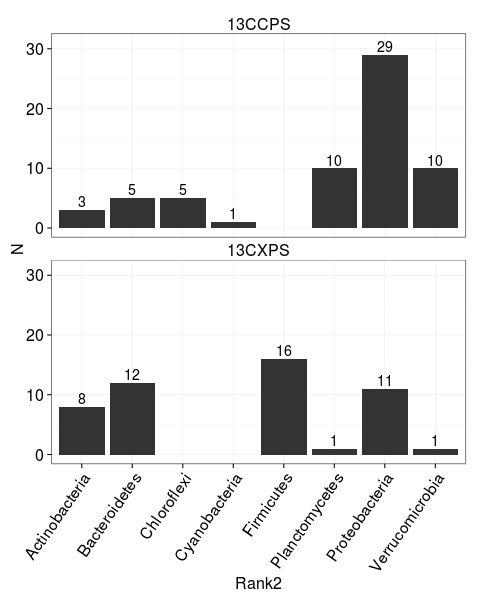

In [48]:
%%R -h 600
FDR = 0.10

d = l2fc.df %>% 
    group_by(OTU, Rank2, Treatment) %>%
    summarize(minP = min(padj)) %>%
    group_by(Rank2, Treatment) %>%
    summarize(N = sum(minP <= FDR)) %>%
    group_by(Treatment) %>%
    mutate(N.pct = N / sum(N)) %>%
    group_by() %>%
    filter(N > 0) %>%
    arrange(desc(N))

p = ggplot(d, aes(x = Rank2, y = N))

p = p + facet_wrap(~Treatment, ncol = 1)

p = p + geom_bar(stat = "identity")

p = p + geom_text(aes(label = N, vjust = -0.25))

p = p + theme_bw()

p = p + scale_y_continuous(limits = c(0, max(d$N) + 2))

p = p + theme(strip.text = element_text(size = 16),
              strip.background = element_blank(),
              axis.text.y = element_text(size = 16),
              axis.text.x = element_text(size = 16, angle = 55, hjust = 1),
              axis.title = element_text(size = 16))

p

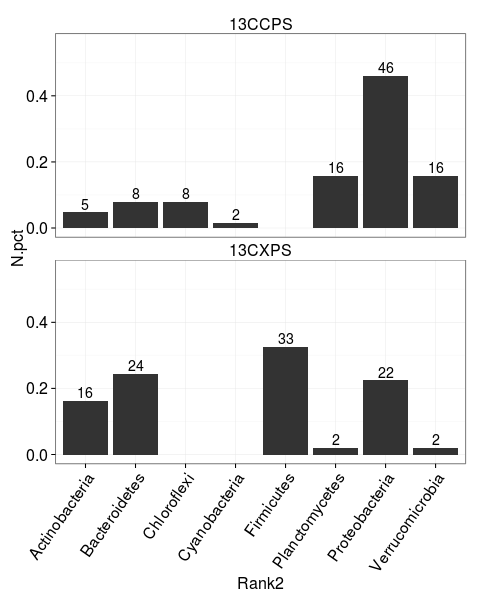

In [119]:
%%R -h 600
FDR = 0.10

d = l2fc.df %>% 
    group_by(OTU, Rank2, Treatment) %>%
    summarize(minP = min(padj)) %>%
    group_by(Rank2, Treatment) %>%
    summarize(N = sum(minP <= FDR)) %>%
    group_by(Treatment) %>%
    mutate(N.pct = N / sum(N)) %>%
    group_by() %>%
    filter(N > 0) %>%
    arrange(desc(N))

p = ggplot(d, aes(x = Rank2, y = N.pct))

p = p + facet_wrap(~Treatment, ncol = 1)

p = p + geom_bar(stat = "identity")

p = p + geom_text(aes(label = round(N.pct, 2) * 100, vjust = -0.25))

p = p + theme_bw()

p = p + scale_y_continuous(limits = c(0, max(d$N.pct) + 0.1))

p = p + theme(strip.text = element_text(size = 16),
              strip.background = element_blank(),
              axis.text.y = element_text(size = 16),
              axis.text.x = element_text(size = 16, angle = 55, hjust = 1),
              axis.title = element_text(size = 16))

p

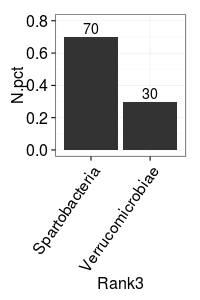

In [234]:
%%R -h 300 -w 200
FDR = 0.10

d = l2fc.df %>% 
    filter(Treatment == "13CCPS", Rank2 == "Verrucomicrobia") %>%
    group_by(OTU, Rank3) %>%
    summarize(minP = min(padj)) %>%
    group_by(Rank3) %>%
    summarize(N = sum(minP <= FDR)) %>%
    mutate(N.pct = N / sum(N)) %>%
    group_by() %>%
    filter(N > 0) %>%
    arrange(desc(N))

p = ggplot(d, aes(x = Rank3, y = N.pct))

p = p + geom_bar(stat = "identity")

p = p + geom_text(aes(label = round(N.pct, 2) * 100, vjust = -0.25))

p = p + theme_bw()

p = p + scale_y_continuous(limits = c(0, max(d$N.pct) + 0.1))

p = p + theme(strip.text = element_text(size = 16),
              strip.background = element_blank(),
              axis.text.y = element_text(size = 16),
              axis.text.x = element_text(size = 16, angle = 55, hjust = 1),
              axis.title = element_text(size = 16))

p

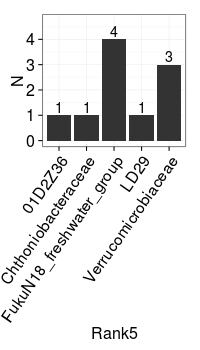

In [247]:
%%R -h 350 -w 200
FDR = 0.10

d = l2fc.df %>% 
    filter(Treatment == "13CCPS", Rank2 == "Verrucomicrobia") %>%
    group_by(OTU, Rank5) %>%
    summarize(minP = min(padj)) %>%
    group_by(Rank5) %>%
    summarize(N = sum(minP <= FDR)) %>%
    #mutate(N.pct = N / sum(N)) %>%
    group_by() %>%
    filter(N > 0) %>%
    arrange(desc(N))

p = ggplot(d, aes(x = Rank5, y = N))

p = p + geom_bar(stat = "identity")

p = p + geom_text(aes(label = N, vjust = -0.25))

p = p + theme_bw()

p = p + scale_y_continuous(limits = c(0, max(d$N) + 0.75))

p = p + theme(strip.text = element_text(size = 16),
              strip.background = element_blank(),
              axis.text.y = element_text(size = 16),
              axis.text.x = element_text(size = 16, angle = 55, hjust = 1),
              axis.title = element_text(size = 16))

p

In [41]:
%%R
d %>% select(Rank2, Treatment, N) %>% spread(Treatment, N)

Source: local data frame [8 x 3]

            Rank2 13CCPS 13CXPS
1  Actinobacteria      3      8
2   Bacteroidetes      5     12
3     Chloroflexi      5     NA
4   Cyanobacteria      1     NA
5      Firmicutes     NA     16
6  Planctomycetes     10      1
7  Proteobacteria     29     11
8 Verrucomicrobia     10      1


In [42]:
%%R
d %>% select(Rank2, Treatment, N.pct) %>% spread(Treatment, N.pct)

Source: local data frame [8 x 3]

            Rank2     13CCPS     13CXPS
1  Actinobacteria 0.04761905 0.16326531
2   Bacteroidetes 0.07936508 0.24489796
3     Chloroflexi 0.07936508         NA
4   Cyanobacteria 0.01587302         NA
5      Firmicutes         NA 0.32653061
6  Planctomycetes 0.15873016 0.02040816
7  Proteobacteria 0.46031746 0.22448980
8 Verrucomicrobia 0.15873016 0.02040816


In [43]:
%%R
FDR = 0.10

l2fc.df %>% 
    group_by(OTU, Treatment)  %>%
    summarize(minP = min(padj)) %>%
    group_by(Treatment) %>%
    summarize(N = sum(minP <= FDR))              

Source: local data frame [2 x 2]

  Treatment  N
1    13CCPS 63
2    13CXPS 49


In [138]:
%%R
FDR = 0.10

l2fc.df %>% 
    group_by(OTU, Treatment)  %>%
    summarize(minP = min(padj), minD = min(Day)) %>%
    filter(minP <= FDR) %>% 
    group_by(Treatment) %>%
    summarize(N = sum(minD %in% c(1, 3, 7)))              

Source: local data frame [2 x 2]

  Treatment  N
1    13CCPS 37
2    13CXPS 49


In [139]:
%%R
FDR = 0.10

l2fc.df %>% 
    group_by(OTU, Treatment)  %>%
    summarize(minP = min(padj), minD = min(Day)) %>%
    filter(minP <= FDR) %>% 
    group_by(Treatment) %>%
    summarize(N = sum(minD %in% c(14, 30)))              

Source: local data frame [2 x 2]

  Treatment  N
1    13CCPS 26
2    13CXPS  0


In [149]:
%%R
FDR = 0.10

l2fc.df %>%
    filter(padj <= FDR) %>%
    group_by(Day, Rank2, Treatment) %>%
    summarize(N = n()) %>%
    group_by(Day, Treatment) %>%
    mutate(N.rel = N / sum(N)) %>%
    group_by() %>%
    spread(Treatment, N.rel) %>%
    arrange(Day, desc(`13CXPS`))

Source: local data frame [32 x 5]

   Day           Rank2  N     13CCPS     13CXPS
1    1      Firmicutes 16         NA 0.84210526
2    1  Proteobacteria  2         NA 0.10526316
3    1   Bacteroidetes  1         NA 0.05263158
4    3   Bacteroidetes 12         NA 0.63157895
5    3  Proteobacteria  5         NA 0.26315789
6    3      Firmicutes  1         NA 0.05263158
7    3 Verrucomicrobia  1         NA 0.05263158
8    3  Proteobacteria  2 1.00000000         NA
9    7  Actinobacteria  8         NA 0.53333333
10   7  Proteobacteria  6         NA 0.40000000
11   7      Firmicutes  1         NA 0.06666667
12   7     Chloroflexi  3 0.60000000         NA
13   7  Proteobacteria  1 0.20000000         NA
14   7 Verrucomicrobia  1 0.20000000         NA
15  14  Proteobacteria  2         NA 0.33333333
16  14  Actinobacteria  1         NA 0.16666667
17  14      Firmicutes  1         NA 0.16666667
18  14  Planctomycetes  1         NA 0.16666667
19  14 Verrucomicrobia  1         NA 0.16666667
20  1

In [44]:
%%R
l2fc.df %>% 
    group_by(Treatment, Day)  %>%
    summarize(N = sum(padj <= FDR))

Source: local data frame [9 x 3]
Groups: Treatment

  Treatment Day  N
1    13CCPS   3  2
2    13CCPS   7  5
3    13CCPS  14 42
4    13CCPS  30 39
5    13CXPS   1 19
6    13CXPS   3 19
7    13CXPS   7 15
8    13CXPS  14  6
9    13CXPS  30  1


In [45]:
%%R
l2fc.df %>% 
    filter(Day == 3) %>%
    group_by(Treatment, Day, Rank6, Rank2, OTU)  %>%
    summarize(N = sum(padj <= FDR)) %>%
    group_by() %>%
    spread(Treatment, N) %>%
    arrange(desc(`13CCPS`))

Source: local data frame [712 x 6]

   Day              Rank6          Rank2      OTU 13CCPS 13CXPS
1    3         Cellvibrio Proteobacteria    OTU.6      1      1
2    3    Sandaracinaceae Proteobacteria   OTU.32      1      1
3    3      Acinetobacter Proteobacteria  OTU.203      0     NA
4    3      Adhaeribacter  Bacteroidetes   OTU.95      0      0
5    3 Altererythrobacter Proteobacteria  OTU.347      0      0
6    3         Arenimonas Proteobacteria   OTU.34      0      0
7    3         Arenimonas Proteobacteria  OTU.384      0      0
8    3         Arenimonas Proteobacteria   OTU.92      0      0
9    3           Bacillus     Firmicutes OTU.1623      0      0
10   3           Bacillus     Firmicutes OTU.2301      0      0
.. ...                ...            ...      ...    ...    ...


In [49]:
%%R
l2fc.df %>% 
    filter(Day == 7) %>%
    group_by(Treatment, Day, Rank6, Rank2, OTU)  %>%
    summarize(N = sum(padj <= FDR)) %>%
    group_by() %>%
    spread(Treatment, N) %>%
    arrange(desc(`13CCPS`))

Source: local data frame [775 x 6]

   Day                            Rank6           Rank2      OTU 13CCPS 13CXPS
1    7                       Cellvibrio  Proteobacteria    OTU.6      1      0
2    7                       uncultured Verrucomicrobia   OTU.83      1      0
3    7 uncultured_Chloroflexi_bacterium     Chloroflexi OTU.4322      1      0
4    7 uncultured_Chloroflexi_bacterium     Chloroflexi   OTU.64      1      0
5    7 uncultured_Chloroflexi_bacterium     Chloroflexi   OTU.98      1      0
6    7                    Acinetobacter  Proteobacteria  OTU.485      0      0
7    7                    Adhaeribacter   Bacteroidetes   OTU.95      0      0
8    7                          AKYG587  Planctomycetes  OTU.553      0     NA
9    7               Altererythrobacter  Proteobacteria  OTU.347      0      0
10   7                      Amaricoccus  Proteobacteria OTU.5263      0      0
.. ...                              ...             ...      ...    ...    ...


In [65]:
%%R
l2fc.df %>% 
    filter(Day > 7, Treatment == "13CCPS") %>%
    group_by(Treatment, Day, Rank2)  %>%
    summarize(N = sum(padj <= FDR)) %>%
    group_by(Day, Treatment) %>%
    mutate(N.rel = N / sum(N)) %>%
    group_by() %>%
    arrange(Day, desc(N.rel))

Source: local data frame [34 x 5]

   Treatment Day                  Rank2  N      N.rel
1     13CCPS  14         Proteobacteria 21 0.50000000
2     13CCPS  14         Planctomycetes  7 0.16666667
3     13CCPS  14        Verrucomicrobia  6 0.14285714
4     13CCPS  14            Chloroflexi  4 0.09523810
5     13CCPS  14         Actinobacteria  3 0.07142857
6     13CCPS  14          Cyanobacteria  1 0.02380952
7     13CCPS  14          Acidobacteria  0 0.00000000
8     13CCPS  14        Armatimonadetes  0 0.00000000
9     13CCPS  14          Bacteroidetes  0 0.00000000
10    13CCPS  14 Candidate_division_WS3  0 0.00000000
11    13CCPS  14             Chlamydiae  0 0.00000000
12    13CCPS  14               Chlorobi  0 0.00000000
13    13CCPS  14             Firmicutes  0 0.00000000
14    13CCPS  14       Gemmatimonadetes  0 0.00000000
15    13CCPS  14            JL-ETNP-Z39  0 0.00000000
16    13CCPS  14            Nitrospirae  0 0.00000000
17    13CCPS  14                     NA  0 0.00

In [75]:
%%R
l2fc.df %>% 
    filter(Day > 7, Treatment == "13CCPS", Rank2 == "Proteobacteria") %>%
    group_by(Treatment, Day, Rank3)  %>%
    summarize(N = sum(padj <= FDR)) %>%
    #group_by(Day, Treatment, Rank3) %>%
    mutate(N.rel = N / sum(N)) %>%
    group_by() %>%
    arrange(Day, desc(N.rel))

Source: local data frame [8 x 5]

  Treatment Day               Rank3  N      N.rel
1    13CCPS  14 Alphaproteobacteria 14 0.66666667
2    13CCPS  14 Gammaproteobacteria  4 0.19047619
3    13CCPS  14  Betaproteobacteria  3 0.14285714
4    13CCPS  14 Deltaproteobacteria  0 0.00000000
5    13CCPS  30 Alphaproteobacteria  5 0.41666667
6    13CCPS  30 Deltaproteobacteria  5 0.41666667
7    13CCPS  30  Betaproteobacteria  1 0.08333333
8    13CCPS  30 Gammaproteobacteria  1 0.08333333


In [46]:
%%R
l2fc.df %>% 
    filter(Day == 3) %>%
    group_by(Treatment, Day, Rank6, Rank2, OTU)  %>%
    summarize(N = sum(padj <= FDR)) %>%
    group_by() %>%
    spread(Treatment, N) %>%
    arrange(desc(`13CXPS`))

Source: local data frame [712 x 6]

   Day           Rank6           Rank2      OTU 13CCPS 13CXPS
1    3      Cellvibrio  Proteobacteria    OTU.6      1      1
2    3    Chitinophaga   Bacteroidetes  OTU.183     NA      1
3    3  Chthoniobacter Verrucomicrobia  OTU.241     NA      1
4    3     Dyadobacter   Bacteroidetes  OTU.760     NA      1
5    3 Ferruginibacter   Bacteroidetes OTU.5906     NA      1
6    3 Flavisolibacter   Bacteroidetes  OTU.360     NA      1
7    3  Flavobacterium   Bacteroidetes  OTU.107      0      1
8    3  Flavobacterium   Bacteroidetes  OTU.131      0      1
9    3  Flavobacterium   Bacteroidetes   OTU.14      0      1
10   3  Flavobacterium   Bacteroidetes  OTU.159      0      1
.. ...             ...             ...      ...    ...    ...


In [102]:
%%R
FDR = 0.10

l2fc.df %>%
    group_by(OTU, Treatment, Rank2) %>%
    summarize(minP = min(padj)) %>%
    filter(minP <= FDR) %>%
    group_by(Treatment, Rank2) %>%
    summarize(N = n()) %>%
    mutate(N.rel = N / sum(N)) %>%
    group_by() %>%
    select(Rank2, N.rel, Treatment) %>%
    spread(Treatment, N.rel) %>%
    arrange(desc(`13CCPS`))

Source: local data frame [8 x 3]

            Rank2     13CCPS     13CXPS
1  Proteobacteria 0.46031746 0.22448980
2  Planctomycetes 0.15873016 0.02040816
3 Verrucomicrobia 0.15873016 0.02040816
4   Bacteroidetes 0.07936508 0.24489796
5     Chloroflexi 0.07936508         NA
6  Actinobacteria 0.04761905 0.16326531
7   Cyanobacteria 0.01587302         NA
8      Firmicutes         NA 0.32653061


In [111]:
%%R
FDR = 0.10

l2fc.df %>%
    group_by(OTU, Treatment, Rank6, Rank2) %>%
    summarize(minP = min(padj)) %>%
    filter(minP <= FDR, Rank2 == "Proteobacteria") %>%
    group_by(Treatment, Rank6) %>%
    summarize(N = n()) %>%
    mutate(N.rel = N / sum(N)) %>%
    group_by() %>%
    select(Rank6, N.rel, Treatment) %>%
    spread(Treatment, N.rel) %>%
    arrange(desc(`13CCPS`))

Source: local data frame [16 x 3]

               Rank6     13CCPS     13CXPS
1            Devosia 0.20689655         NA
2                 NA 0.13793103 0.54545455
3      Asticcacaulis 0.06896552         NA
4      Brevundimonas 0.06896552         NA
5  Pseudoxanthomonas 0.06896552         NA
6          Rhizobium 0.06896552 0.09090909
7    Sandaracinaceae 0.06896552 0.09090909
8         uncultured 0.06896552         NA
9         Cellvibrio 0.03448276 0.09090909
10        Dokdonella 0.03448276         NA
11    Hydrogenophaga 0.03448276         NA
12    Nannocystaceae 0.03448276         NA
13     Polyangiaceae 0.03448276         NA
14      Sphingopyxis 0.03448276         NA
15  Stenotrophomonas 0.03448276 0.09090909
16      Enterobacter         NA 0.09090909


In [152]:
%%R
FDR = 0.10

l2fc.df %>%
    group_by(OTU, Treatment, Rank5, Rank2) %>%
    summarize(minP = min(padj)) %>%
    filter(minP <= FDR, Rank2 == "Verrucomicrobia") %>%
    group_by(Treatment, Rank5) %>%
    summarize(N = n()) %>%
    mutate(N.rel = N / sum(N)) %>%
    group_by() %>%
    select(Rank5, N.rel, Treatment) %>%
    spread(Treatment, N.rel) %>%
    arrange(desc(`13CCPS`))

Source: local data frame [5 x 3]

                     Rank5 13CCPS 13CXPS
1 FukuN18_freshwater_group    0.4     NA
2      Verrucomicrobiaceae    0.3     NA
3                  01D2Z36    0.1     NA
4      Chthoniobacteraceae    0.1      1
5                     LD29    0.1     NA


In [166]:
%%R
FDR = 0.10

l2fc.df %>%
    group_by(OTU, Treatment, Rank3, Rank2) %>%
    summarize(minP = min(padj)) %>%
    filter(minP <= FDR, Rank2 == "Actinobacteria") %>%
    group_by(Treatment, Rank3) %>%
    summarize(N = n()) %>%
    group_by() %>%
    spread(Treatment, N)

Source: local data frame [4 x 3]

              Rank3 13CCPS 13CXPS
1        Frankiales     NA      2
2     Micrococcales     NA      6
3 Pseudonocardiales      2     NA
4  Streptomycetales      1     NA


In [171]:
%%R
FDR = 0.10

l2fc.df %>%
    group_by(OTU, Treatment, Rank2, Rank3) %>%
    summarize(minP = min(padj)) %>%
    filter(minP <= FDR) %>%
    group_by(OTU, Rank2, Rank3) %>%
    summarize(N = n()) %>%
    filter(N == 2)

Source: local data frame [8 x 4]
Groups: OTU, Rank2

      OTU           Rank2               Rank3 N
1  OTU.11  Proteobacteria Gammaproteobacteria 2
2 OTU.150  Planctomycetes    Planctomycetacia 2
3 OTU.165  Proteobacteria Alphaproteobacteria 2
4  OTU.19  Proteobacteria Alphaproteobacteria 2
5 OTU.241 Verrucomicrobia      Spartobacteria 2
6  OTU.32  Proteobacteria Deltaproteobacteria 2
7   OTU.5  Proteobacteria  Betaproteobacteria 2
8   OTU.6  Proteobacteria Gammaproteobacteria 2


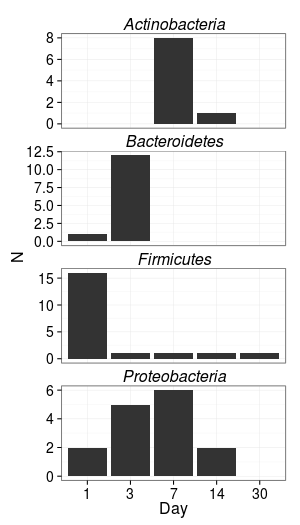

In [216]:
%%R -h 525 -w 300
FDR = 0.10

d = l2fc.df %>%
    filter(Treatment == "13CXPS", padj <= FDR) %>%
    group_by(Day, Rank2) %>%
    summarize(N = n()) %>%
    filter(Rank2 %in% c("Actinobacteria", "Firmicutes", "Bacteroidetes", "Proteobacteria"))

p = ggplot(d, aes(x = factor(Day), y = N))

p = p + facet_wrap(~Rank2, ncol = 1, scales = "free_y")

p = p + geom_bar(stat = "identity")

p = p + theme_bw()

p = p + theme(axis.text = element_text(size = 14), 
              axis.title = element_text(size = 16),
              strip.text = element_text(size = 16, face = "italic"), 
              strip.background = element_blank())

p = p + labs(x = "Day")

p

In [221]:
%%R
ggsave("figs/xylose_rspndr_bar.pdf", p, h = 6, w = 3)

In [218]:
FileLink("figs/xylose_rspndr_bar.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/xylose_rspndr_bar.pdf

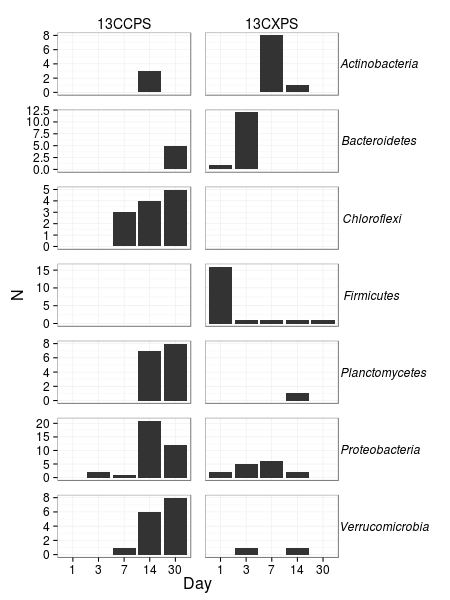

In [75]:
%%R -h 600 -w 450
FDR = 0.10

d = l2fc.df %>%
    filter(padj <= FDR) %>%
    group_by(Day, Rank2, Treatment) %>%
    summarize(N = n()) %>%
    filter(Rank2 %in% c("Actinobacteria", 
                        "Firmicutes", 
                        "Bacteroidetes", 
                        "Chloroflexi", 
                        "Verrucomicrobia", 
                        "Planctomycetes", 
                        "Proteobacteria"))

p = ggplot(d, aes(x = factor(Day), y = N))

p = p + facet_grid(Rank2 ~ Treatment, scales = "free_y")

p = p + geom_bar(stat = "identity")

p = p + theme_bw()

p = p + theme(axis.text = element_text(size = 12), 
              axis.title = element_text(size = 16),
              strip.text.y = element_text(size = 12, angle = 0, hjust = 0.1, face = "italic"), 
              strip.text.x = element_text(size = 14), 
              strip.background = element_blank(), 
              panel.margin = unit(1, "lines"))

p = p + labs(x = "Day")

p

In [45]:
%%R
l2fc.df %>%
    filter(padj <= FDR) %>%
    group_by(Day, Rank2, Treatment) %>%
    summarize(N = n()) %>%
    filter(Rank2 %in% c("Chloroflexi", 
                        "Verrucomicrobia", 
                        "Planctomycetes", 
                        "Proteobacteria"))

Source: local data frame [19 x 4]
Groups: Day, Rank2

   Day           Rank2 Treatment  N
1    1  Proteobacteria    13CXPS  2
2    3  Proteobacteria    13CCPS  2
3    3  Proteobacteria    13CXPS  5
4    3 Verrucomicrobia    13CXPS  1
5    7     Chloroflexi    13CCPS  3
6    7  Proteobacteria    13CCPS  1
7    7  Proteobacteria    13CXPS  6
8    7 Verrucomicrobia    13CCPS  1
9   14     Chloroflexi    13CCPS  4
10  14  Planctomycetes    13CCPS  7
11  14  Planctomycetes    13CXPS  1
12  14  Proteobacteria    13CCPS 21
13  14  Proteobacteria    13CXPS  2
14  14 Verrucomicrobia    13CCPS  6
15  14 Verrucomicrobia    13CXPS  1
16  30     Chloroflexi    13CCPS  5
17  30  Planctomycetes    13CCPS  8
18  30  Proteobacteria    13CCPS 12
19  30 Verrucomicrobia    13CCPS  8


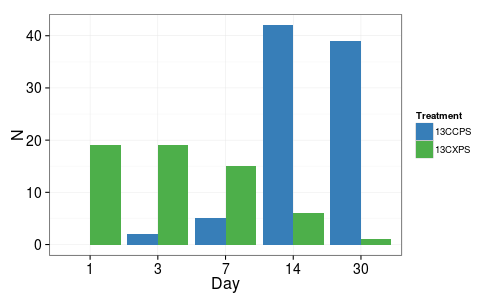

In [213]:
%%R -w 500 -h 300
colours = c("#377eb8", "#4daf4a")

d = l2fc.df %>%
    filter(padj <= FDR) %>%
    group_by(Day, Treatment) %>%
    summarize(N = n())
d = rbind(d, data.frame(Day = 1, Treatment = "13CCPS", N = NA))

p = ggplot(d, aes(x = factor(Day), y = N, fill = Treatment))

p = p + geom_bar(size = 2, stat = "identity", position = "dodge")

p = p + scale_fill_manual(values = colours)

p = p + theme_bw()

p = p + theme(axis.text = element_text(size = 14), 
              axis.title = element_text(size = 16),
              strip.text = element_text(size = 16, face = "italic"), 
              strip.background = element_blank())

p = p + labs(x = "Day")

p

In [214]:
%%R
ggsave("figs/all_rspndr_bar.pdf", p, h = 3, w = 5)

In [215]:
FileLink("figs/all_rspndr_bar.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/all_rspndr_bar.pdf

In [5]:
%%R
mdf = tbl_df(data.table::fread("../data/mdf.csv"))

Read 2195072 rows and 18 (of 18) columns from 0.435 GB file in 00:00:05


In [8]:
%%R
colnames(mdf)

 [1] "OTU"                  "Sample"               "Abundance"           
 [4] "X.SampleID"           "BarcodeSequence"      "Day"                 
 [7] "Density"              "LinkerPrimerSequence" "Treatment"           
[10] "Description"          "Rank1"                "Rank2"               
[13] "Rank3"                "Rank4"                "Rank5"               
[16] "Rank6"                "Rank7"                "Rank8"               


In [34]:
%%R
mdf %>%
    filter(Treatment %in% c("13CCPS", "12CCPS", "13CXPS"), 
           grepl("bulk", Sample)) %>%
    group_by(Sample) %>%
    mutate(Relative.Abund = Abundance / sum(Abundance, na.rm = TRUE)) %>%
    filter(Rank2 == "Acidobacteria") %>%
    group_by(Rank3, Sample) %>%
    summarize(RA = sum(Relative.Abund)) %>%
    group_by() %>%
    arrange(desc(RA))

Source: local data frame [276 x 3]

   Rank3          Sample         RA
1  DA023 cont.PS.30.bulk 0.20160280
2  DA023  13X.PS.14.bulk 0.18382831
3  DA023  13X.PS.30.bulk 0.17932998
4  DA023   13X.PS.1.bulk 0.15873942
5  DA023  13C.PS.30.bulk 0.15868506
6  DA023  13C.PS.14.bulk 0.15439485
7  DA023   13X.PS.3.bulk 0.15405405
8  DA023   13C.PS.3.bulk 0.09993662
9  DA023  cont.PS.3.bulk 0.09940233
10 DA023   13X.PS.7.bulk 0.09619733
..   ...             ...        ...


In [35]:
%%R
mdf %>%
    filter(Treatment %in% c("13CCPS", "12CCPS", "13CXPS"), 
           grepl("bulk", Sample)) %>%
    group_by(Sample) %>%
    mutate(Relative.Abund = Abundance / sum(Abundance, na.rm = TRUE)) %>%
    filter(Rank2 == "Acidobacteria") %>%
    group_by(Rank2, Sample) %>%
    summarize(RA = sum(Relative.Abund)) %>%
    group_by() %>%
    arrange(desc(RA))

Source: local data frame [12 x 3]

           Rank2          Sample        RA
1  Acidobacteria cont.PS.30.bulk 0.2381668
2  Acidobacteria  13X.PS.14.bulk 0.2206807
3  Acidobacteria  13X.PS.30.bulk 0.2134881
4  Acidobacteria   13X.PS.1.bulk 0.1952145
5  Acidobacteria   13X.PS.3.bulk 0.1907658
6  Acidobacteria  13C.PS.30.bulk 0.1907468
7  Acidobacteria  13C.PS.14.bulk 0.1884491
8  Acidobacteria   13C.PS.3.bulk 0.1314177
9  Acidobacteria  cont.PS.3.bulk 0.1311733
10 Acidobacteria   13X.PS.7.bulk 0.1233299
11 Acidobacteria   13C.PS.7.bulk 0.1201635
12 Acidobacteria  cont.PS.1.bulk 0.1116928
